In [162]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from math import *

In [163]:
def lecture_donnees(nom_fichier, delimiteur=',',prop_test=0.4):
  
   
    data = np.loadtxt(nom_fichier, delimiter=delimiteur)
   
   
    [nb_ligne, nb_colonne] = data.shape
    N=nb_ligne
    nb_var=nb_colonne-1
    Y=np.zeros((N,1))
   
    
    X = data[:,:-1]
    Y = data[:,-1].reshape(N,1)


    return X, Y, N, nb_var

In [164]:
X, Y, N, nb_var = lecture_donnees("TP2 ex2data1.txt")
print("Affichage des 10 premiers exemples du dataset : ")
for i in range(0, 10):
    print(f"x = {X[i,:]}, y = {Y[i]}")

Affichage des 10 premiers exemples du dataset : 
x = [34.62365962 78.02469282], y = [0.]
x = [30.28671077 43.89499752], y = [0.]
x = [35.84740877 72.90219803], y = [0.]
x = [60.18259939 86.3085521 ], y = [1.]
x = [79.03273605 75.34437644], y = [1.]
x = [45.08327748 56.31637178], y = [0.]
x = [61.10666454 96.51142588], y = [1.]
x = [75.02474557 46.55401354], y = [1.]
x = [76.0987867  87.42056972], y = [1.]
x = [84.43281996 43.53339331], y = [1.]


In [165]:
def normalisation(X):

    X_norm = np.zeros(X.shape)
    mu = np.zeros((1,X.shape[1]))
    sigma = np.zeros((1,X.shape[1]))
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X-mu)/sigma 

    return X_norm, mu, sigma


In [166]:
X,mu,sigma=normalisation(X)

In [167]:
X=np.hstack((np.ones((N,1)), X))

In [168]:
def affichage(X, Y):
    
    
    X1 = X[:, 1]
    X2 = X[:, 2]
    Y = Y.reshape(X.shape[0], 1)
   

    plt.scatter(X1, X2, c=Y, cmap='viridis', edgecolors='k')
    
    plt.show()
    
    return None


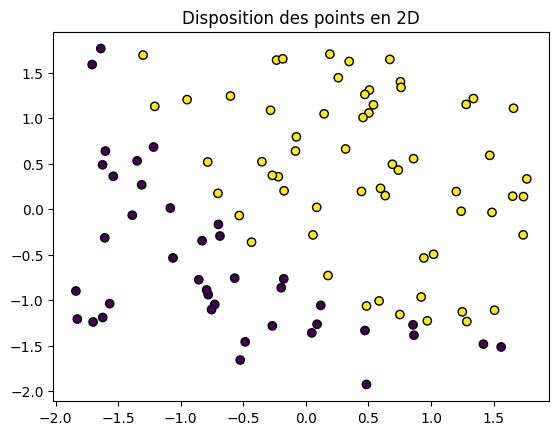

In [169]:
plt.title("Disposition des points en 2D")
affichage(X,Y)


In [170]:
alpha = 0.01
nb_iters = 10000


In [171]:
def sigmoide(z):
 

    s = 1 / (1 + np.exp(-z))

    return s


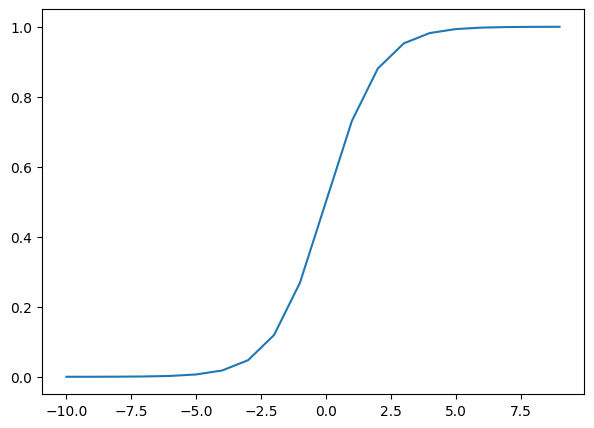

In [184]:
nums=np.arange(-10,10,step=1)
fif,ax=plt.subplots(figsize=(7,5))
ax.plot(nums,sigmoide(nums))

In [172]:
def cout(X, Y, theta):

    
    
    cout = -np.sum(Y*(np.log(sigmoide(np.dot(X, theta.T)))) +(1-Y)*(np.log(1-sigmoide(np.dot(X, theta.T)))))
    return cout




In [173]:
def gradientdescente(X, Y, theta, alpha, nb_iters):

    
    
    N = X.shape[0]
    J_history = np.zeros(nb_iters)
   

    for i in range(0, nb_iters):
       
        theta = theta - alpha * (1/N) * np.sum(( sigmoide(np.dot(X, theta.T)) - Y  ) * X,0)
    
        
        J_history[i] = cout(X, Y, theta)
            

    return theta, J_history


In [174]:
theta = np.zeros((1,nb_var+1))
theta, J_history = gradientdescente(X, Y, theta, alpha, nb_iters)
theta

array([[1.27071379, 3.04735849, 2.81165934]])

Text(0, 0.5, 'Cout J')

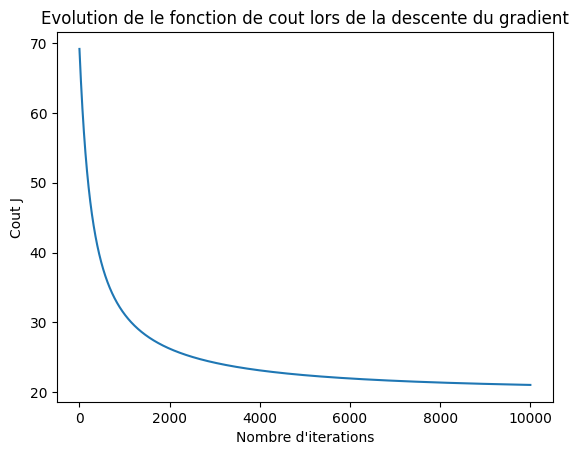

In [175]:
plt.title("Evolution de le fonction de cout lors de la descente du gradient")
plt.plot(range(J_history.size), J_history)
plt.xlabel("Nombre d'iterations")
plt.ylabel("Cout J")


In [176]:
def prediction(X,theta):
 
    p = np.zeros((X.shape[0],1))
    p = sigmoide(np.dot(X, theta.T)) >= 0.5
    

    return p


In [219]:
Yperd=prediction(X,theta)



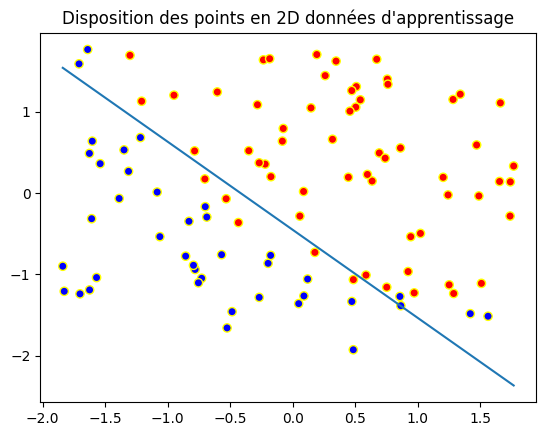

In [221]:
plt.title("Disposition des points en 2D données d'apprentissage")

xval=[np.min(X[:,1]),np.max(X[:,1])]
yval=-(theta[0][0]+np.dot(theta[0][1],xval))/theta[0][2]
plt.plot(xval,yval,label='ad')
plt.scatter(X[:,1],X[:,2],c=Y.ravel(),cmap='bwr',edgecolors='yellow',label='noad')
plt.show()


In [210]:
theta[0][1]

3.047358487283475

In [203]:
t=[1.27071379, 3.04735849, 2.81165934]

In [195]:
t

[1.27071379, 3.04735849, 2.81165934]